In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

from tqdm import tqdm

In [2]:
np.random.seed = 42

In [325]:
def infect(df, contacts, probability=1.0):
    unique, counts = np.unique(contacts, return_counts=True)
    
    roll = np.random.uniform(0,1,len(unique))

    state = df.loc[unique,"state"]
    probability = 1 - np.power(1-probability, counts)
    change = np.array(roll <= probability).astype(int)
    
    df.loc[unique,"state"] = state + np.maximum(change*(1-state),0)

In [433]:
def init(nAgents=1000, nPatientZero=1,G=G):
    state = np.zeros(nAgents)

    vaccinated = []
    for i in range(G.shape[0]):
        #if (np.sum(np.minimum(G[i,],1)) > 15):
        if (np.random.binomial(1,.5,1) >= .5):
            vaccinated += [1]
        else:
            vaccinated += [0]
    data = {"state": state, "vaccinated": vaccinated}

    df = pd.DataFrame(data)
    patientZero = df.index[0:nPatientZero]
    infect(df, patientZero, probability=1.0)
    return df


In [434]:

def recover(df, probability=1.0):    
    roll = np.random.uniform(0,1,len(df[df["state"] == 1]))
    chance = np.array(roll <= probability).astype(int)
    
    df.loc[df["state"] == 1,"state"] = 1 + chance


The infect and recover functions are called at every time step. For this we create a step function. Here, we are generating the list of random contacts which has a length of a constant time the number of infected agents.

In [435]:
def step(df,G=None):
    part1 = df.state.values
    vaccinated = df.vaccinated.values 
    part2 = 1-part1
    part3 = np.random.binomial(size=(len(df),len(df)),n=1,p=.3-.15*vaccinated)
    part4 = np.multiply(G,np.multiply(part3,np.outer(part1,part2)))
    df.state = np.minimum(np.sum(part4,axis=0),1)
    recover(df, _chanceOfRecovery)

In [436]:
def simulate(df, stats, nSteps=100, mode="random", nRandomContacts=0, plotLattice=False, G=None):
    for i in tqdm(range(nSteps)):        
        step(df,G=G)
            
        stats["nSusceptible"].append(np.sum(df["state"] == 0))    
        stats["nInfected"].append(np.sum(df["state"] == 1))
        stats["nRemoved"].append(np.sum(df["state"] == 2))



In order to get a feeling for the variations in the outcome of our agent based model we will run the simulation ten times. For each experiment we initialize a set of 10'000 agents with 5 infected patients zero to start with. We then perform 150 time steps.

In [437]:
_daysCuredAfter = 10
_chanceOfRecovery = 1./_daysCuredAfter

In [444]:
_nExperiments = 100
_nAgents = 1000
_nSteps = 1

_nPatientZero = 500

x = np.linspace(0,_nSteps-1,_nSteps)
allStats = []

import networkx as nx
import math


rr_tot = []


for _nPatientZero in range(10,500,50):


    rr = []

    for iExp in range(_nExperiments):
        sequence = np.random.poisson(500,_nAgents)
        try:
            G = nx.adjacency_matrix(nx.configuration_model(sequence)).todense()
        except:
            sequence[1] = sequence[1] + 1
            G = nx.adjacency_matrix(nx.configuration_model(sequence)).todense()
        print("Starting Experiment:",iExp+1,"/",_nExperiments)
        st = {"nInfected": [], "nRemoved": [], "nSusceptible": []}

        df = init(_nAgents, _nPatientZero,G=G)

        simulate(df, stats=st, nSteps=_nSteps,G=G)



        df = df.loc[_nPatientZero:,:]
        num = np.sum(df[df.vaccinated==1.0].state)/len(df[df.vaccinated==1.0].values)

        denom = np.sum(df[df.vaccinated==0.0].state)/len(df[df.vaccinated==0.0].values)


        print (num/denom)
        if (not math.isinf(num/denom)):
            rr += [num/denom]


    rr_tot += [np.mean(rr)]




Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.6252790178571429


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.35it/s]

0.5892088342186189


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.12it/s]

0.62


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.24it/s]

0.6376811594202899


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.5727581242287124


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

0.6468214693566806


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.61it/s]

0.6835109456991609


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.80it/s]

0.5942098146822556


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.6295503875968992


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.79it/s]

0.6964093208392071


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.44it/s]

0.6726128573550947


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.57it/s]

0.7154258715362023


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.21it/s]

0.602914206757945


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.34it/s]

0.6193401015228427


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.59it/s]

0.6420093225904627


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.49it/s]

0.6216162774603049


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.09it/s]

0.6519123896698267


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.18it/s]

0.6419987349778621


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.78it/s]

0.6602105263157895


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

0.5975806451612904


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

0.6857856959753909


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

0.5590135537445295


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

0.6049328641121298


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.81it/s]

0.6137375761624259


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.7


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.03it/s]

0.608477768036397


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.36it/s]

0.549202477927906


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.32it/s]

0.5980882418020091


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.35it/s]

0.6454598033545402


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.90it/s]

0.7383952254641909


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.85it/s]

0.6568128914952496


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.22it/s]

0.6952157711263373


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.35it/s]

0.6097858417608567


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.65it/s]

0.6641942540010596


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.81it/s]

0.6925032616331582


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.08it/s]

0.5673036476173307


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.43it/s]

0.6210526315789474


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]

0.5947316385563398


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.74it/s]

0.6443092511203966


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.14it/s]

0.6976829867365318


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.97it/s]

0.6435682175161133


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.16it/s]

0.6366447866700329


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.73it/s]

0.6966727883224828


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.45it/s]

0.6640227476803352


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.05it/s]

0.6548499845652889


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.01it/s]

0.6118598382749326


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

0.6564266867696946


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.90it/s]

0.6220478216224146


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.22it/s]

0.6485837349686964


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

0.7127272727272728


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

0.5478222073503988


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.98it/s]

0.7122507122507122


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

0.6267857142857143


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.26it/s]

0.6408992786816196


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.24it/s]

0.6531899555448756


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.03it/s]

0.5707193816884661


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.13it/s]

0.6480093915884034


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.48it/s]

0.619884024295789


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.56it/s]

0.6943653955606146


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.99it/s]

0.6572830027724462


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.47it/s]

0.6485203666568214


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

0.5708162015571691


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.6193489655982498


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]

0.6802717722917594


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.19it/s]

0.6505433154068163


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.03it/s]

0.6448638032618905


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.82it/s]

0.6570027883776566


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

0.6355741033160389


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

0.6468291159012808


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.28it/s]

0.5878317152103559


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

0.6233766233766234


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.34it/s]

0.6395211365555611


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.91it/s]

0.5941171154888849


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.53it/s]

0.689922480620155


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

0.6283253426110568


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.23it/s]

0.6495126705653022


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.6420376466076508


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.90it/s]

0.6887392442947999


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

0.6265973510067998


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.96it/s]

0.640154635908486


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.62it/s]

0.6359102244389028


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.84it/s]

0.6865301397425649


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

0.686230105313168


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.7136799797421434


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.5308174576733198


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.65it/s]

0.6384092098377813


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.5905904886099679


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.05it/s]

0.5828877005347594


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.02it/s]

0.6521403353927625


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

0.5898295866569979


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

0.677090562109646


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.83it/s]

0.6787878787878788


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

0.5458226747419189


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.22it/s]

0.6590510034540413


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.72it/s]

0.5919889544219832


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.67it/s]

0.6707113646147224


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

0.6493192291579389


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

0.7048091176660151


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.44it/s]

0.61080740117746


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

0.48649193945239455


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.27it/s]

0.9935514526201465


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.01it/s]

0.9882468973452783


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.05it/s]

0.9802870609800005


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

1.01553899568126


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.26it/s]

0.9903608080187148


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

0.9659748797958984


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.79it/s]

0.9871299871299871


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]

0.9864823169358807


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.05it/s]

0.9275787265489046


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.75it/s]

0.9464372680060079


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.9725568694319854


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.91it/s]

0.9599507186858315


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

1.0182421711899792


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9622953319403746


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.03it/s]

0.9799348068319778


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

1.0017050834108372


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.18it/s]

0.9624217118997913


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.88it/s]

1.0135851557322728


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.91it/s]

0.9533055370521138


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

0.9399939265107806


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.73it/s]

0.9733079438672022


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

0.9655243042185208


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

0.9700609618424022


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.9602124183006536


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

0.9360830808622979


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

0.9461196243203165


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9627859477124184


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.9636176549324053


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

0.9920165975103733


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

0.9666159217645989


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

0.9590735883604692


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]

0.9805825242718448


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.04it/s]

0.96884622051989


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.79it/s]

0.9884463894967178


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

0.9767240229425103


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.956129394485559


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.43it/s]

1.0082026840586982


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

0.9811458697188533


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.83it/s]

0.9763234077750207


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.06it/s]

0.9682410693555342


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

0.9732897070614629


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.65it/s]

0.9889580680352248


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

0.9803145249541984


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.36it/s]

0.9692014760507911


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

0.9528927840591993


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

0.985404578126361


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.03it/s]

0.9639581842557637


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.06it/s]

0.9896853342623585


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

0.9788060755916638


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.966694786290856


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

0.9936036588397104


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.79it/s]

0.9792499814474301


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.84it/s]

0.9736357659434582


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

0.9631698737843989


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

0.9907748000233549


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9556803490627019


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.04it/s]

1.0016341508266882


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]

0.9572304274488831


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.95it/s]

0.9698515074246287


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.9981156098803157


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.52it/s]

0.967741935483871


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

0.9754613982803818


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.74it/s]

0.9521291950875514


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.09it/s]

0.9390939312319527


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.76it/s]

0.967101117633403


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.81it/s]

0.9675259750539497


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.17it/s]

0.9913899138991389


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.9817556257352352


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]

0.9652518541663241


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.28it/s]

0.9909315676989482


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

0.9548717202580144


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.13it/s]

0.9668876862821576


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.08it/s]

0.992034533719639


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9530046697089909


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.88it/s]

0.9634770736147457


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

0.9834687075874607


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.9560229445506692


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.44it/s]

0.9858699240673491


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

0.9764467706893145


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.90it/s]

0.9530728714758827


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.97it/s]

0.9738766296435639


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

0.9766407485503428


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.68it/s]

0.9500000000000001


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.50it/s]

0.973158230583973


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.59it/s]

0.9738922747488059


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

0.9775012243251806


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.46it/s]

0.9886944017454257


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

0.9818388708140262


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.22it/s]

0.9950012329734722


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

1.0061349693251533


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

0.9498875316762051


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.32it/s]

0.9851329628813656


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.12it/s]

0.9652249761364009


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.77it/s]

0.971097308488613


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.76it/s]

0.9633090469500443


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.73it/s]

0.9508247042933736


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.80it/s]

0.9902725366876309


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.95it/s]

0.950690190312832


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.47it/s]

1.017818348844042


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.68it/s]

0.9542404812268642


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.62it/s]

0.9824759415468695


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.88it/s]

0.9974886506326669


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

0.9977746495886121


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.68it/s]

1.0277948089106888


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.37it/s]

0.9897637085137085


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.09it/s]

0.9735084957385594


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.31it/s]

0.9748263335670129


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.62it/s]

1.0104498269896194


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.9969156988184471


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.01it/s]

1.0304568063784656


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

0.9817444219066935


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.06it/s]

1.0161565651411555


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.12it/s]

1.0105982228150179


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.07it/s]

1.002764675664316


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]

0.9957369614512472


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.73it/s]

0.9996209144283665


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.03it/s]

0.9948609515054011


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.67it/s]

0.9615003334474866


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9996464655862158


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.83it/s]

1.028061674417741


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.56it/s]

0.9885524525517146


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9853235610385986


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.0229166666666667


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.57it/s]

1.0142165759225652


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.18it/s]

1.0148481542098564


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

0.9676582337132795


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9593754206488088


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.993876848985208


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

0.9951351474232193


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.9982399719869887


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.11it/s]

0.9994945363979745


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.9807478863782731


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.9847717853864767


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.56it/s]

0.9951913314750891


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.40it/s]

1.0142205828660233


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.89it/s]

0.9990981996199557


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

0.9922545726017169


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.74it/s]

0.9764524647887323


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

0.9886822595989876


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.45it/s]

0.989382481093805


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.34it/s]

1.0016345240704214


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

0.9950639562655911


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

0.9780165561098625


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.02it/s]

1.0248359887535146


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.14it/s]

0.9882961275626423


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.48it/s]

1.002379349460035


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.92it/s]

1.0114234972551233


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

0.9843184226286452


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.44it/s]

1.0029491515947782


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.83it/s]

0.9910629740185954


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

1.0274627425250726


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.12it/s]

0.991343896713615


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.91it/s]

1.0463131370542986


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

1.0278701422777552


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.18it/s]

1.003407700011127


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.05it/s]

0.9686325187969925


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.39it/s]

1.0011594041590146


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.27it/s]

1.0050874126676117


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

1.0039323273891174


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.57it/s]

0.9753226789401394


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.94it/s]

0.992123778381953


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.52it/s]

1.0211218771670072


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.986962071480671


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

1.0295321637426902


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.63it/s]

1.004420866489832


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.28it/s]

0.9916816723680618


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.81it/s]

0.9633463806875542


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.37it/s]

0.9789926129914593


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

1.0062840150367502


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

0.9973511459173097


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]

0.9928843064467822


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

1.0081168831168832


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

1.0056533294365853


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.0165546845837998


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

1.0011594041590146


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

1.0151843817787418


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

0.9945072161908097


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

1.0231534090909091


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9984506633097703


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

0.9914015437824961


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

0.9883339839671718


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0032365130010636


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.9986111564220034


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

0.9959246780818756


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.00it/s]

1.0074509043569786


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

0.9904885410435665


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.9896240123512852


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9533150114062978


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.22it/s]

0.9980832420591456


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

1.0194435194435194


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

1.0278498325708627


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.40it/s]

0.962324399135225


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

1.020736485205075


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

1.0215379736208794


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

1.0103054839896946


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

1.0131644038916068


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

0.9820996613449443


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

0.9285327924273157


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

1.0234210234210237


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

0.9998626373626375


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

0.9853339259019839


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.61it/s]

1.01588405259661


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.94it/s]

1.0253272140064593


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.9785795959852623


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

1.027140799822754


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.01it/s]

1.0002072023538187


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

1.0002864977694101


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

1.023271833239723


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.87it/s]

0.9835718832782308


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

1.0148931804910384


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

0.9968765948759826


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.21it/s]

1.0135856680479105


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.9882107217451845


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]

0.9879584017515052


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.88it/s]

0.9814058244290802


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.44it/s]

1.0303335009217363


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]

1.0078711396690005


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.08it/s]

1.001056130214643


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

1.0021598272138228


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.21it/s]

0.9983395599833957


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.18it/s]

0.996339409912878


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

0.9865556978233034


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.9971954639678087


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.02it/s]

0.9745993810705641


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9877432142712673


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.81it/s]

1.003481086098863


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.39it/s]

1.0011017184748923


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

1.0130151843817787


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.24it/s]

0.9531872509960159


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.9987770077456175


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

1.0143884892086332


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

1.0067388196855218


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.49it/s]

0.9769462798046539


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.90it/s]

1.0126526570579824


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.19it/s]

0.9823798017855682


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.9791462917685412


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

1.0032087823651101


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.75it/s]

0.998985627116528


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

1.0133270321361059


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

0.998224733324071


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

0.993801652892562


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.35it/s]

0.9973688504528025


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

1.0059710873664363


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

1.0182437476670398


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

1.012147118518974


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]

1.0092355950942329


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.26it/s]

1.0303008070432869


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.47it/s]

0.9793791954148301


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

0.9889685603971319


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.971856477082485


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.37it/s]

0.9874892148403797


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.53it/s]

1.0214179597226807


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0069701566959124


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.85it/s]

0.9969251166466945


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

0.9999225166589184


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.75it/s]

0.9971694971694972


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.9879511900248967


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

1.0052519250083698


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

1.0029693170570768


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9743149907420955


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 16.25it/s]

0.9752551176915683


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.9791739507167505


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.79it/s]

0.9981896309552298


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.40it/s]

0.9691397750605252


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

1.0058497536945814


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9850673194614443


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.9889067115173977


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.97it/s]

1.0210660375388854


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9834978814847851


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.989859780589316


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

1.0136426073926073


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.68it/s]

1.0051767676767676


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.006894843317782


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.77it/s]

1.013074559478272


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.21it/s]

1.011624903125807


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.90it/s]

1.0222426470588235


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.46it/s]

0.9587580906148869


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.91it/s]

0.9941842669115396


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.73it/s]

0.9912524441700115


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

0.983577773187358


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

1.0198609731876862


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.49it/s]

1.0000411359698063


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

0.9980925993890114


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

0.9938755118839918


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

1.0268167175668326


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

1.0186416154668791


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

1.0186851355875461


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

1.009873949579832


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

1.0442696039863624


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.75it/s]

0.9997047316749096


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.95it/s]

0.9959499732545403


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.47it/s]

1.026688710439301


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.93it/s]

1.0000770673311583


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.70it/s]

1.015910086118815


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9857939619286262


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.9714617098556297


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

0.9730646377824012


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

0.98644581439276


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.011644727325329


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

1.0263879101088402


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.0474275576581904


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9995451046259359


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.9956388074640738


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.93it/s]

0.9986618882502153


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

1.0015391303326167


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.94it/s]

0.9809596875435903


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

1.009492924528302


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.15it/s]

1.0032113714135298


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

0.9976629058254664


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.90it/s]

1.0108383297264698


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.79it/s]

1.0085394958961522


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

0.982734912146677


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

1.0502960707693045


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

0.990948417736399


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

0.9963506628268956


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.53it/s]

0.9831749484772155


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

1.0002736612906105


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

1.028014184397163


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.76it/s]

0.9635800888971632


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

1.0027765798443935


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9809228913706525


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

1.0093172020581282


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.07it/s]

0.9998664436856899


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

0.9875454735037191


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.85it/s]

1.0024763566897006


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.62it/s]

0.9826522121030002


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

1.0614561632710708


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9833722633516765


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.37it/s]

1.0036733837111669


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

0.9954067096924241


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

0.9862873253876714


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

0.9635887485700185


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

0.9791179948660264


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.28it/s]

0.9802582683017464


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

1.012137203166227


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.71it/s]

0.9795138888888888


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.84it/s]

1.0045546975093151


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]

0.9914152591729762


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.08it/s]

0.9951216132738304


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

0.9844560185185184


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

0.9917957227138644


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.43it/s]

0.9716485112563544


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.47it/s]

1.0229614383078172


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.9875299898829311


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]

1.027915174256638


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

1.0160919540229885


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

0.9863109048723898


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.35it/s]

0.9679551093282632


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

1.017445719161847


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

0.9739352620893319


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.76it/s]

1.0103150412483966


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.99it/s]

1.0180878552971577


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

0.9886419753086421


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

0.9870967741935482


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.15it/s]

0.9780708373480688


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

0.9767353165522501


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.77it/s]

0.9917228372856496


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

0.9909753356734902


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

0.9939115365193041


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.54it/s]

0.9915046296296295


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

0.9829288358700122


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.24it/s]

0.9964663682447455


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

0.9981590231170768


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.94it/s]

1.0004444548410487


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.36it/s]

0.9930581516394151


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.87it/s]

1.0167630740172353


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0177304341202458


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.95it/s]

1.0120558375634519


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

1.0147132887258075


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]

0.9944820842355241


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.9917273751844493


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

0.975675269761316


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.81it/s]

1.0365673894897613


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.22it/s]

0.9852120919983474


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

0.9969979716024341


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

1.0164638850970384


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.94it/s]

1.0219861140332422


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.49it/s]

1.008736323978818


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

0.9954067096924241


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.09it/s]

0.997995283018868


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

1.0029630064247366


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.10it/s]

1.00307991570757


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

1.0173225747511243


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

1.0322439649622273


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.22it/s]

1.0180345969819655


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.49it/s]

0.9960520149953139


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

1.022373218428903


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0213998845795986


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.04it/s]

0.9799917455777806


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.48it/s]

0.971605623381428


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.73it/s]

0.9902783705600607


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.33it/s]

0.9913440168440754


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.41it/s]

1.0125471113019415


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.18it/s]

1.0019347410651758


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.34it/s]

0.9832553869107393


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.13it/s]

1.0330336861437341


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

0.9884822069351816


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.12it/s]

1.016049091338211


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.55it/s]

1.0190826877190915


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.70it/s]

1.0085145634512365


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.37it/s]

1.0061936339522546


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]

0.97934554973822


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.9930555555555556


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.49it/s]

1.0094154332111689


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.63it/s]

1.0136810545081303


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

1.0012819506579806


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.02it/s]

0.9726870126745267


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

1.0049412393162394


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.16it/s]

1.0211584236974345


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]

0.9946091644204852


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

1.0108695652173914


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.90it/s]

1.0005155661312712


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

0.9748406508571202


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

0.9812831389183458


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.40it/s]

1.0066468580013817


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

1.0269041354651554


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]

1.0047638160535337


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.91it/s]

0.9780031612223393


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.24it/s]

0.9739957256753817


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.32it/s]

1.0329978071913557


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.42it/s]

0.98972623116641


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.34it/s]

0.9644158932864565


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

1.002930373251229


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

1.010068748985005


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

1.0232707774798928


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.09it/s]

1.0028785647342346


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

1.0186683596968753


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

1.01245480112495


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.85it/s]

0.990314769975787


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.00it/s]

0.9886541471048514


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.39it/s]

1.0367622995527435


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

1.019436018424896


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.71it/s]

0.9657142857142857


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.43it/s]

1.0195030724018166


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0123621784163046


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.80it/s]

1.0050251256281408


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.28it/s]

0.9930226434965773


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.04it/s]

1.0370382863889356


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

0.9852862349914238


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.0292472945246813


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

0.9779569892473118


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]

1.004515358292668


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.07it/s]

1.0334901572365978


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.11it/s]

1.0056860238207388


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.74it/s]

1.0044159026347321


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

0.9900202400753492


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.04it/s]

1.0467219749089438


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.63it/s]

1.0211578702627295


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

1.0136731713792644


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]

0.9785964728661888


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

0.9995478723404254


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

1.0352902089770424


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.25it/s]

1.0355669224211423


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9777777777777779


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.91it/s]

0.9662685391783697


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

1.0201063865377538


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0039585829888646


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.26it/s]

0.976542341074361


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

0.9896853566758294


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.63it/s]

1.0153994095772223


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.9883228725733468


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.96it/s]

0.9930068095044412


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.76it/s]

0.953771289537713


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.33it/s]

0.9909564120090437


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.84it/s]

0.997951201341032


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

1.0233694154958444


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

0.9899946815583034


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.21it/s]

0.9821220159151194


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

0.9944178628389154


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

1.0028531054437793


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.09it/s]

1.0167782078159437


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.68it/s]

1.0129601357082274


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.10it/s]

1.008895181109093


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

0.9808220625528317


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

1.0096397767630645


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

0.9921773571725134


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.75it/s]

1.0087153868879757


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.18it/s]

0.9887971580438935


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.15it/s]

0.9968504760224517


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]

0.99221251583152


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

0.9993235930735931


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.27it/s]

1.0169536564625852


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

0.9691085613415711


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.9911932719771501


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

1.0300737013628956


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.63it/s]

1.006858045755713


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.29it/s]

1.0014758381364552


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.07it/s]

1.0198913161908911


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

1.0188337341692038


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.74it/s]

1.0238709677419355


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.33it/s]

0.9988782650499439


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.16it/s]

1.006504434234427


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.88it/s]

1.0109718498659517


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.23it/s]

0.9955628023843254


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.70it/s]

1.028782894736842


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.94it/s]

1.000081175420083


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9886777328746534


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

1.0047894966004622


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.68it/s]

1.0006917739933672


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.91it/s]

1.008617323513175


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.37it/s]

0.9884104044012686


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.28it/s]

0.9716123715116413


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.16it/s]

1.0073522654167815


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

0.9767378048780487


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.94it/s]

0.9858541084072113


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.41it/s]

1.0169147336854283


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.29it/s]

0.9870466321243525


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.79it/s]

1.0010061282356169


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.24it/s]

1.013157894736842


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.28it/s]

0.988868484889705


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.74it/s]

0.9894977168949773


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.52it/s]

1.0049850448654036


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.86it/s]

1.0060499699810652


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

1.01279548574043


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]

0.9837914023960534


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

0.9995649201317672


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.98it/s]

0.9938187437505681


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

0.9987539655238314


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.80it/s]

0.9952986558977759


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

1.0047684028150443


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.81it/s]

0.9879754103897858


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.11it/s]

0.9976307636231092


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

1.0004780704459935


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

0.9900863447393667


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

1.0516925677261844


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.75it/s]

1.0208743355700538


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

1.020902547065338


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

0.99792243767313


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.07it/s]

0.9711779448621553


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

1.0175453466689268


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0181437330997447


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

0.9885891642703911


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

0.9755005408185647


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

1.0213660380269196


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

0.9986449864498645


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

1.0084678161624838


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

0.9740407174752137


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.11it/s]

0.9792718575604572


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.71it/s]

1.063171547983154


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

0.9964228044286143


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

1.0198548414552997


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.15it/s]

0.9956543669731889


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.07it/s]

0.9915958710148899


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

1.0016667181085834


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

1.0362749008658112


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.10it/s]

0.9767769176636173


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

1.0123785072437193


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

1.0021312154060809


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

1.0424567253010921


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.43it/s]

1.0117991171663792


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

0.9935123913325546


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

0.9860398338220918


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0070676274944568


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9789580225868315


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

1.0148050974512746


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

1.0234597118759827


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

1.011897016451343


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

1.0089995396654903


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

1.0142289925378898


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.9853876007260632


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.97it/s]

1.0081946624803766


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

1.0187452782674389


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.96it/s]

0.9877728466624398


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.91it/s]

1.024845792852322


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9788444108761328


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

1.0208333333333333


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.95it/s]

1.0201768306506462


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.15it/s]

1.0344950241480977


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.07it/s]

0.9921921921921921


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.44it/s]

0.9981040086673891


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.27it/s]

1.0015614953614402


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

0.9934713473182069


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.74it/s]

1.0125231910946197


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

0.9982877372679383


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

0.9704595679429937


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.82it/s]

0.9970825748027822


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.85it/s]

1.014608483254263


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.85it/s]

0.9907054558973882


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.9846605868661046


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.0172501268391678


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.91it/s]

1.0119139479613568


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.76it/s]

1.0367330504537429


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.37it/s]

0.995459442819763


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.22it/s]

1.0142605082454303


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

0.9879721942742157


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

1.0066656544184633


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

0.9953651402838175


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.03it/s]

0.9933673469387755


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.24it/s]

1.0130307014152036


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.24it/s]

0.9807300170803831


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

1.0138078598586886


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.24it/s]

0.9575905080620628


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

1.0433566433566435


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.50it/s]

1.0005362537764348


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

1.0346350862352554


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.85it/s]

0.9807334874654335


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.70it/s]

0.9729355394175337


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.76it/s]

1.0507717781108503


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

1.0310637108792846


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9774858859952649


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.21it/s]

1.0181292695743562


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9938123187893361


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

0.9786545024026742


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.01it/s]

0.9618953967180873


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]

1.0188454417129553


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.28it/s]

0.9727630543164523


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

0.9748603351955307


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.18it/s]

1.0248016671585858


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.10it/s]

1.0150039109720543


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.15it/s]

0.9836087420042643


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

0.9812910748357007


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

0.9737710208325864


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.9867823976361333


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.11it/s]

1.0022306170174493


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.97it/s]

0.9928774928774927


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

1.010459903702474


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.74it/s]

1.0033945364979848


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9802573594218228


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.03it/s]

0.9953310696095076


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

1.0157702612792432


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.75it/s]

0.9616267773558245


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

0.9993998923336247


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

1.0465359909574614


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.08it/s]

0.986624704956727


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

1.0208647516988094


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.9886363636363634


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

1.0081719264978102


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.9920164821014679


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

1.0384488750685934


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

1.0147078727723888


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

0.9819667511975203


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.10it/s]

0.9885087765536871


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.07it/s]

1.0067876117201797


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.24it/s]

1.005509641873278


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

1.0282258064516128


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.19it/s]

1.0078895463510849


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.08it/s]

1.0238021391795973


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

0.9566196798525548


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

0.990946261682243


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.16it/s]

0.9769320388349514


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.25it/s]

1.0151904150620452


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.18it/s]

0.9793601651186788


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.74it/s]

0.9956065784999729


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

1.0084954169461213


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.14it/s]

0.9746890874058504


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9987487487487487


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.19it/s]

0.9962260768230916


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

1.0353800502168455


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

1.009104154708817


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

1.0188896071249014


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.65it/s]

1.0071584353454341


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.93it/s]

1.0434288437918202


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9706079177233025


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.03it/s]

1.0288314949331898


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

1.01417004048583


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.64it/s]

1.0187941743414006


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

1.027891193496289


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.96it/s]

1.024278933917488


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.50it/s]

1.0044290086913814


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.9920282186948854


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.79it/s]

1.0247367910125051


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.09it/s]

0.9994272623138604


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.90it/s]

0.9787277928739899


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.71it/s]

1.035250227479527


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.48it/s]

1.0185343598517251


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.82it/s]

1.0101687561577468


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.84it/s]

1.008516780945507


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.86it/s]

1.0131787509623658


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]

1.018210781651642


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.09it/s]

1.0276567944250872


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.37it/s]

0.9993794106173979


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.68it/s]

1.0302821373491788


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

0.9968449734690953


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.997093023255814


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

1.0098109979415615


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.79it/s]

0.9989431163736352


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

1.0022632265622917


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

1.0346852896409706


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

1.0128097570656638


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.0167865056753944


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.45it/s]

1.0006048315366278


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

1.0195444710783124


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.9751769927089571


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.87it/s]

0.9930392783578378


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.73it/s]

1.0083333333333335


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.981373444858368


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

0.9792553562705004


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

1.0327708219923788


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9640776699029125


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.76it/s]

0.9924700820223208


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.61it/s]

0.9900456789797482


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

0.9904198365736827


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.75it/s]

1.0214762055981492


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.46it/s]

0.9915824915824916


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

0.9680946531099437


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.74it/s]

1.0121416345742404


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.27it/s]

0.9781662405859186


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9955149852258336


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

1.0125786163522013


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.21it/s]

1.0210317460317462


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.42it/s]

0.9730283653057878


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.80it/s]

1.0012437810945272


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

0.9956266400099962


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

0.9899008597638735


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

0.974119367813757


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.04it/s]

1.0578745198463508


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.97it/s]

0.9928133586979497


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.97it/s]

0.9906415031696459


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

1.0284667713239142


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.69it/s]

0.9887680663599903


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

1.0094637223974765


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.9883516734727809


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.36it/s]

0.9895862651280607


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

0.9838398753127434


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

0.9926978114478113


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

1.03854167779713


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.84it/s]

0.9868387962109145


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

0.9459148446490218


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

1.0180170743204315


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

0.9999472907442547


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

1.0139263783888417


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]

1.0428741395427892


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.04it/s]

1.0316579428643502


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.31it/s]

0.9918863460290206


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.9972408563876282


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

1.0196507716131789


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

1.0119785869507607


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

0.9915538821613921


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

1.0222577209797656


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.9843174576902387


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.10it/s]

0.9618766537756971


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.0097402597402596


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.02it/s]

1.0272727272727273


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

1.0308831306187203


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.72it/s]

0.9908536585365854


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.80it/s]

0.972887323943662


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.85it/s]

1.0173128713717778


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9942063287882685


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.36it/s]

1.0200127877237852


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.08it/s]

1.0068027210884354


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.12it/s]

1.0342625889852275


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.02it/s]

1.0141868367836222


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0089399744572158


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.27it/s]

0.998471769030606


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

1.0206161390043706


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

0.9738358286009293


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.26it/s]

1.0287579206137283


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.57it/s]

1.004891158290782


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.76it/s]

0.9768783761663119


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.58it/s]

1.014818192180554


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.86it/s]

0.9992811960897067


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

1.0198675496688743


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.63it/s]

0.9833759055315943


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.72it/s]

0.9776032697773814


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

0.9866600688645596


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.92it/s]

1.0180743243243242


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

1.0286815068493151


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

1.0256913183279743


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0245345269617114


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.63it/s]

0.9714464229928148


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

0.9825115274373779


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

0.9878691648142269


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

1.03139395469174


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.22it/s]

0.9836717278413171


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.26it/s]

0.9782847606642789


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.35it/s]

0.9535615659519169


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

1.0540096464726771


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.968108639547745


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

0.9577868852459016


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

1.0142846616208934


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.85it/s]

1.0118380062305297


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.66it/s]

1.000910341907484


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

1.0117522574812774


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.13it/s]

0.9988252200090205


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]

0.9975376653728977


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.36it/s]

0.995990038411211


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

1.0412089086478862


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.62it/s]

0.9932492113564669


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.05it/s]

0.9809400793900827


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.80it/s]

0.9982394366197183


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.0254472159234065


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

1.0224119869210502


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

0.9840854860462703


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.86it/s]

1.0134442750677506


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.05it/s]

0.975748194014448


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.08it/s]

0.9932432432432432


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.62it/s]

0.9983711676047917


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.25it/s]

0.9868914444479261


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.88it/s]

1.02890739833415


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

1.010339183225245


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.46it/s]

1.0153056404119296


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]

0.9937694704049845


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

1.0325627141588054


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.45it/s]

1.0140022843605905


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.59it/s]

1.0233391307970299


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

1.0249336870026526


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.99it/s]

1.0094043887147335


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

1.0085805241076888


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

1.0051068418993645


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.84it/s]

1.009745314154057


Starting Experiment: 1 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.14it/s]

1.0284235769279313


Starting Experiment: 2 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

1.0239596469104668


Starting Experiment: 3 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.53it/s]

0.9892801310206207


Starting Experiment: 4 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.77it/s]

1.0369927650204467


Starting Experiment: 5 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 18.88it/s]

0.9841700587969245


Starting Experiment: 6 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.69it/s]

0.9652691330976446


Starting Experiment: 7 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.64it/s]

0.9404547922070089


Starting Experiment: 8 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

0.9999015033057952


Starting Experiment: 9 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

0.9887271369914148


Starting Experiment: 10 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.68it/s]

1.0096101180102572


Starting Experiment: 11 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]

0.9752799024498392


Starting Experiment: 12 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.85it/s]

1.0085607276618513


Starting Experiment: 13 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

0.999281804898586


Starting Experiment: 14 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

0.9904471291568067


Starting Experiment: 15 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.01it/s]

1.0349087003222341


Starting Experiment: 16 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]

1.0275279776179056


Starting Experiment: 17 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

0.9907509249075092


Starting Experiment: 18 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.39it/s]

0.9691458063229281


Starting Experiment: 19 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9634888438133874


Starting Experiment: 20 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.22it/s]

1.0100272801002725


Starting Experiment: 21 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.54it/s]

1.0473352033660588


Starting Experiment: 22 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.65it/s]

0.9822243807673628


Starting Experiment: 23 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.14it/s]

0.9798895899053628


Starting Experiment: 24 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.98it/s]

1.0385927260184724


Starting Experiment: 25 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.92it/s]

1.0261509612072817


Starting Experiment: 26 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.69it/s]

0.9862010135982738


Starting Experiment: 27 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.16it/s]

0.9892205428903605


Starting Experiment: 28 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.37it/s]

0.9919137466307278


Starting Experiment: 29 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

1.010891590678825


Starting Experiment: 30 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.43it/s]

0.9815889029003784


Starting Experiment: 31 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

1.0108368452739314


Starting Experiment: 32 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.31it/s]

0.9995990175931031


Starting Experiment: 33 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.06it/s]

0.9888888888888888


Starting Experiment: 34 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.00it/s]

0.968967904653578


Starting Experiment: 35 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.52it/s]

0.9725994003071597


Starting Experiment: 36 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.03it/s]

1.0195057189542485


Starting Experiment: 37 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.20it/s]

0.984167549710154


Starting Experiment: 38 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.94it/s]

0.9712062063306561


Starting Experiment: 39 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.41it/s]

1.0285743352365935


Starting Experiment: 40 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.59it/s]

1.0545176500573468


Starting Experiment: 41 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

1.0187129164764948


Starting Experiment: 42 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.42it/s]

1.0026977743361727


Starting Experiment: 43 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.9991941982272361


Starting Experiment: 44 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.34it/s]

0.9593837535014005


Starting Experiment: 45 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.55it/s]

0.9813713683576697


Starting Experiment: 46 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.84it/s]

1.012677660575447


Starting Experiment: 47 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]

1.0184061387231054


Starting Experiment: 48 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

1.0039848245658705


Starting Experiment: 49 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.24it/s]

1.0074349442379182


Starting Experiment: 50 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.95it/s]

0.9865800865800866


Starting Experiment: 51 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.05it/s]

0.9628424933891172


Starting Experiment: 52 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.58it/s]

0.999281804898586


Starting Experiment: 53 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.93it/s]

0.9736437513727212


Starting Experiment: 54 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.32it/s]

1.0010355365847496


Starting Experiment: 55 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.77it/s]

0.9982703732484396


Starting Experiment: 56 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

0.9842180774748924


Starting Experiment: 57 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.00it/s]

1.0115749227465562


Starting Experiment: 58 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.54it/s]

1.0311440024668517


Starting Experiment: 59 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

1.014311633277085


Starting Experiment: 60 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.60it/s]

1.0384546911162542


Starting Experiment: 61 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]

0.9901639344262295


Starting Experiment: 62 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.11it/s]

0.9812912692589877


Starting Experiment: 63 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.62it/s]

0.9898313492063493


Starting Experiment: 64 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.48it/s]

0.9922699849170435


Starting Experiment: 65 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.53it/s]

0.9819015444015444


Starting Experiment: 66 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.67it/s]

0.9412666475040721


Starting Experiment: 67 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.64it/s]

1.0031738891388013


Starting Experiment: 68 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.70it/s]

0.9812704777739741


Starting Experiment: 69 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.22it/s]

0.9682115991264257


Starting Experiment: 70 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 22.03it/s]

0.9948844259189086


Starting Experiment: 71 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.43it/s]

0.9811767024736375


Starting Experiment: 72 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.21it/s]

1.0435538051662228


Starting Experiment: 73 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.17it/s]

1.011664384414291


Starting Experiment: 74 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.75it/s]

1.012778943353042


Starting Experiment: 75 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.89it/s]

0.9787473128786399


Starting Experiment: 76 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.39it/s]

0.9736284024849678


Starting Experiment: 77 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 13.44it/s]

0.9935607786163676


Starting Experiment: 78 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 14.65it/s]

0.9833333333333333


Starting Experiment: 79 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.80it/s]

0.9651824573150318


Starting Experiment: 80 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 17.92it/s]

1.008308157099698


Starting Experiment: 81 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

0.9689861184326131


Starting Experiment: 82 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.44it/s]

0.9799903629124295


Starting Experiment: 83 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]

1.01096176100309


Starting Experiment: 84 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.87it/s]

1.0233912944364938


Starting Experiment: 85 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.50it/s]

0.9854395400133832


Starting Experiment: 86 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 21.11it/s]

1.032304232263341


Starting Experiment: 87 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

1.0149253731343284


Starting Experiment: 88 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.54it/s]

0.9827856025039124


Starting Experiment: 89 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]

1.005599436348129


Starting Experiment: 90 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.53it/s]

1.0057208237986273


Starting Experiment: 91 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.30it/s]

0.9846751887568214


Starting Experiment: 92 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.97it/s]

1.009771986970684


Starting Experiment: 93 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.78it/s]

0.9936837966035046


Starting Experiment: 94 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.78it/s]

1.042636646120931


Starting Experiment: 95 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.31it/s]

0.9920681551116335


Starting Experiment: 96 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.72it/s]

1.0057341180021127


Starting Experiment: 97 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

0.9958656330749355


Starting Experiment: 98 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.38it/s]

0.9980099502487562


Starting Experiment: 99 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.73it/s]

1.0089141821112007


Starting Experiment: 100 / 100


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.93it/s]

1.0094047828601604


0.9980136947017992


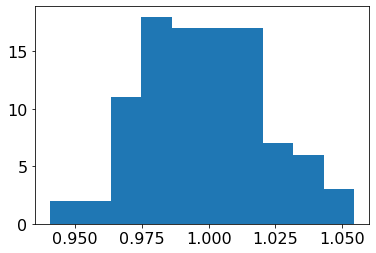

0.9980136947017992


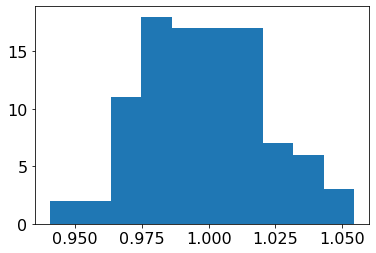

In [445]:
print (np.mean(rr) )
plt.hist(rr)
plt.show()
print (np.mean(rr) )
plt.hist(rr)
plt.show()

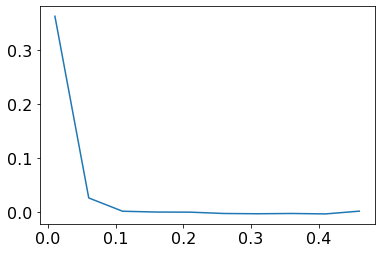

In [447]:
plt.plot( np.arange(10,500,50)/1000,1.0-np.array(rr_tot))